In [ ]:
# Machine Learning Models
"""
--summary
Compare models using barplot
Accuracy score algorithms
1. Logistic regression
2. KNN- K-nearest neighbor
3. SVM- Support Vector Machines
4. Naive Bayes- Gaussian Naive Bayes
5. Random Forest
6. Decision Tree
7. Confusion Matrix
"""

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Control Display
pd.options.display.max_columns=50


# Import warnings
import warnings
warnings.filterwarnings("ignore")



In [5]:
# load/read dataset
df= pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
"""
__summary of the columns
cp= chest pain
trestbps= resting blood pressure
chol= cholesterol
fbs= fasting blood pressure
restecg= resting electrocardiography
exang= exercise induced agina
oldpeak= ST depression induced
slope= the slope of the peak exercise
ca= number of major vessel
thal= normal, flexied defect, reversible defect
target= have disease or not(1=yes, 0=no)
"""


In [6]:
# logistic regression( stastical method used for binary classification used predict either two possible outcomes )
# represented as 0 or 1
# column targets
df.target.value_counts()


1    526
0    499
Name: target, dtype: int64

In [7]:
# Get the mean for training data
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


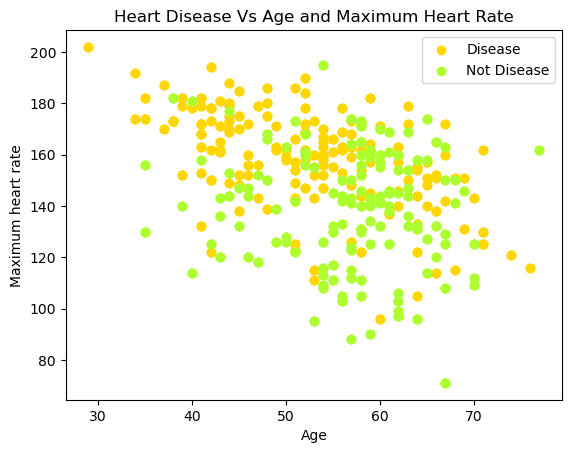

In [8]:
# Create a scatter plot 
# Heart Disease against Age and Maximum heart rate
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target ==1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target ==0], c='#ADFF2F', label='Not Disease')

# Add a legend
plt.legend()

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')

# Set the title of the plot
plt.title('Heart Disease Vs Age and Maximum Heart Rate')

# Show the plot
plt.show()

In [9]:
# Create a logistic regression
# Help to solve the problems with classification
# Create the independent variables and dependant variables

y = df.target.values
x_data = df.drop(['target'],axis =1)

In [10]:
# Normalise the data
x = (x_data-np.min(x_data))/(np.max(x_data)) - np.min(x_data)

In [11]:
# Split the data into 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [14]:
# Get the accuracy using the LogisticRegression
# Getting the Test Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T)*100

accuracies['LogisticRegression'] = acc

# Get output
print('Test Accuracy {:.2f}%'. format(acc))

Test Accuracy 86.83%


In [18]:
# First i port the K-Nearest Neighbor (KNN)
# Get accuracy score of the K-Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# Get the output
print('{} NN Score: {:.2f}'.format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 100.00


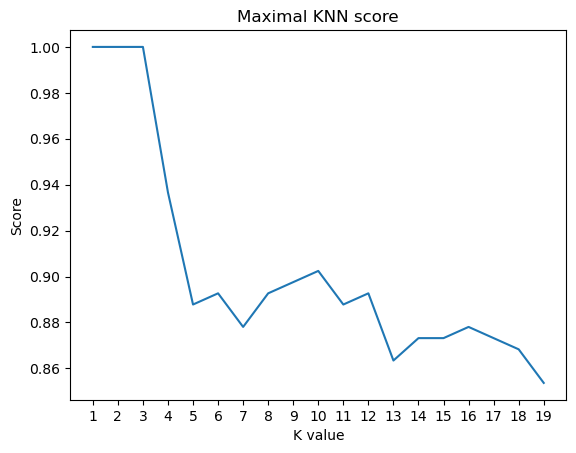

Maximum KNN score is 100.00%


In [20]:
# Get Mximum KNN score for the model
score_list =[]
for i in range (1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximal KNN score')
plt.show()

# Get maximum KNN score for the model in percentage
acc = max(score_list)*100
accuracies['KNN']=acc
print('Maximum KNN score is {:.2f}%'.format(acc))

In [22]:
# Get Test accuracy using the Support Vector Machine (SVM)algorithm
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train.T)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM algorithm: 51.10%


In [25]:
# Get accuracy using the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T)*100
accuracies['Naive Bayes']= acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Accuracy of Naive Bayes: 85.37%


In [26]:
# Get accuracy using the decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print('Decision Tree test accuracy: {:.2f}%'.format(acc))

Decision Tree test accuracy: 100.00%


In [27]:
# Get accuracy of Random Forest Classification Algorithm

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators = 1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest'] = acc

print('Random Forest Algorithm Accurcy Score: {:.2f}%'.format(acc))


Random Forest Algorithm Accurcy Score: 100.00%


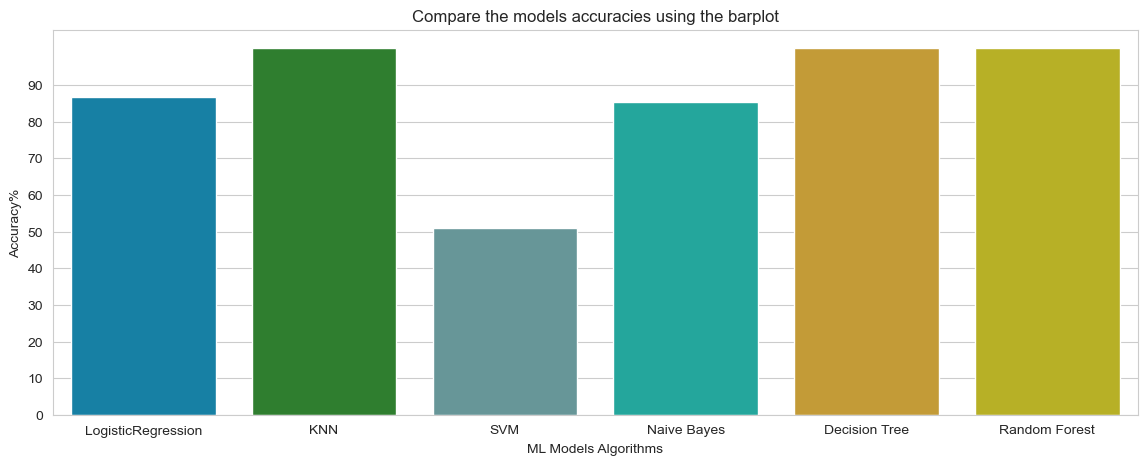

In [30]:
# Compare the models accuracies using the barplot from sns
colours = ('#008BBB','#228B22','#5F9EA0','#0FBBAE','#DAA520','#CFC60E')

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy%')
plt.xlabel('ML Models Algorithms')
plt.title('Compare the models accuracies using the barplot')
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colours)
plt.show()

In [ ]:
# ML Confusion Matrix
# Evaluate the performance of the classification model
"""summary
True Positive(TP): Number of instances predicted as positive correctly(  positive class)
True Negative(TP): Number of instances predicted as negative correctly( negative class)
False Positive(TP): Number of instances predicted as positive incorrectly( positive class)
False Negative(TP): Number of instances predicted as negative incorrectly( negative class)
RDC curve and AUC:RDC( Receiver Operating Characteristic)AUC(Area Under Curve)

"""

In [31]:
# Get confusion matricies to look at the imbalance dataset
# Prediction values
y_head_lr = lr.predict(x_test.T)
knn3 =KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T,y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc= dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)



In [32]:
# Import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

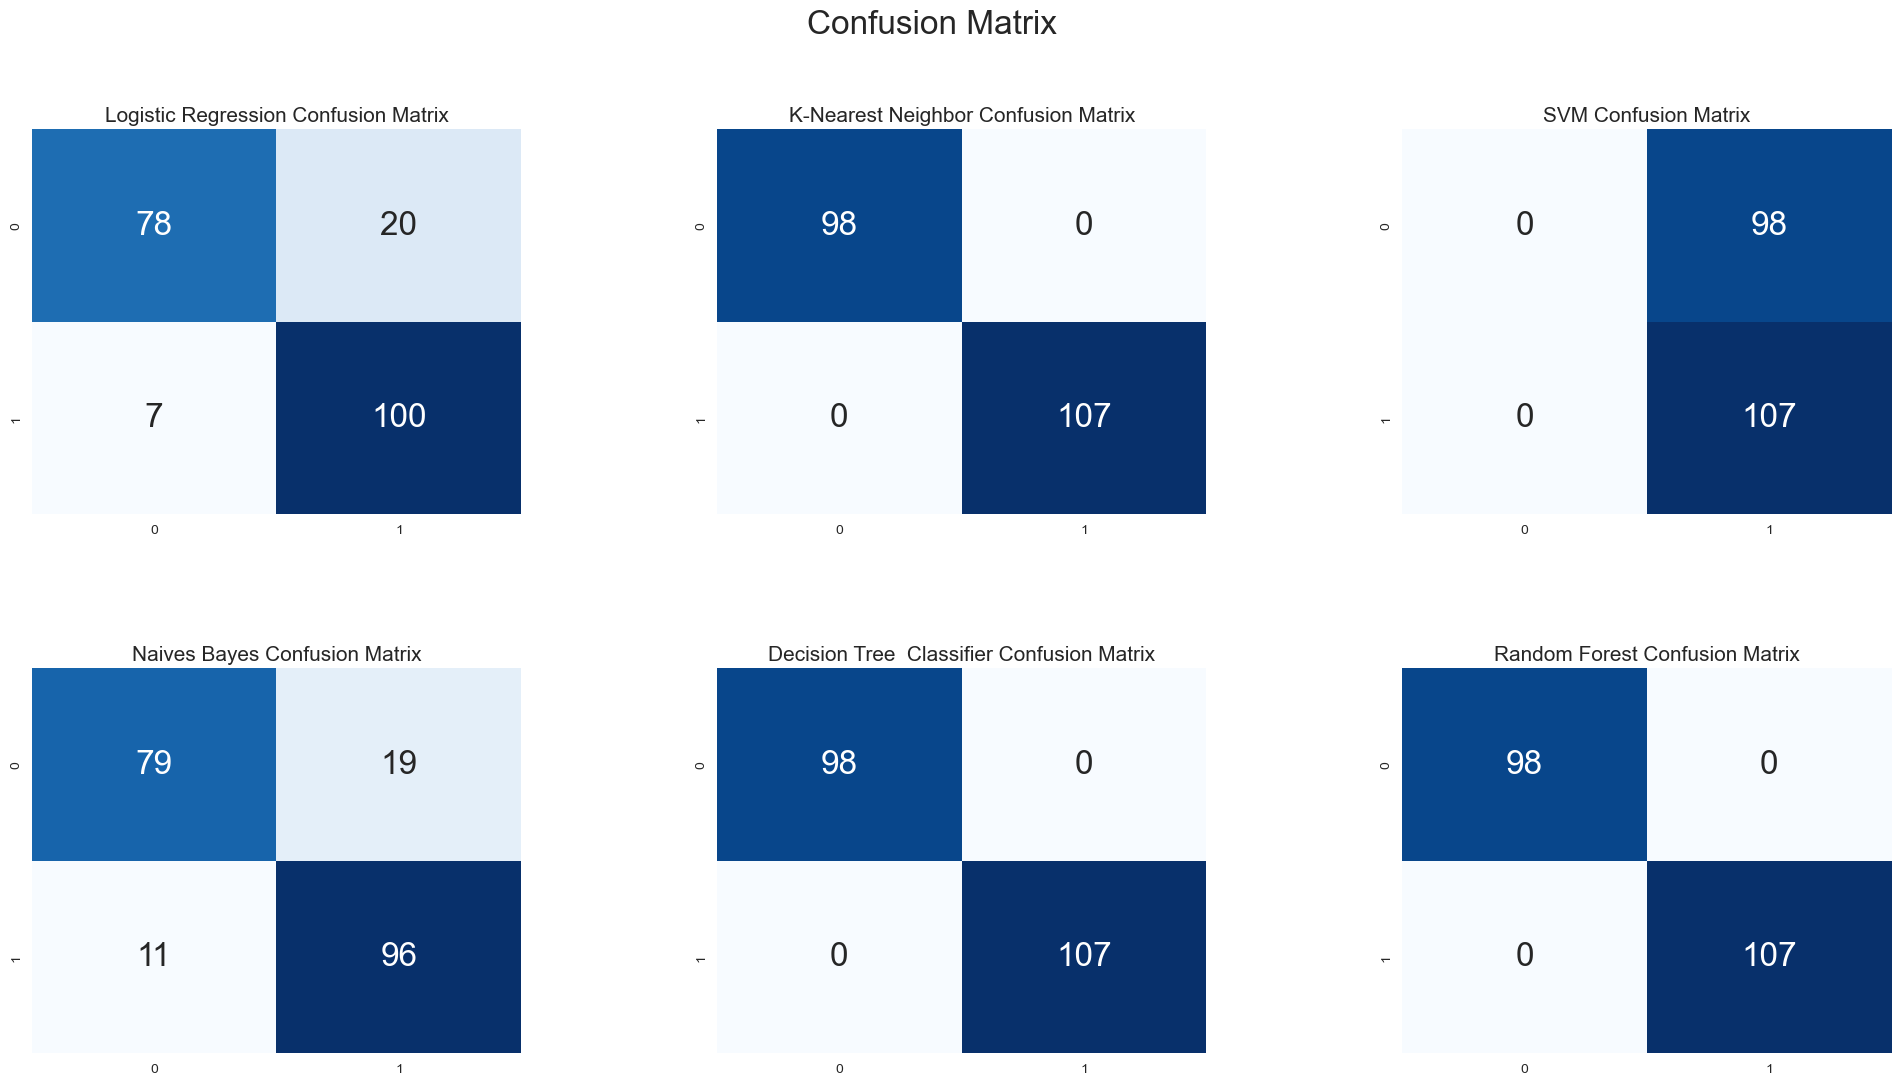

In [43]:
# Plotting for heat map using confusion matrices
plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrix',fontsize= 24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Heat map for Logistic regression Confusion Matrix 
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix',fontsize=15)
sns.heatmap(cm_lr,annot=True,cmap='Blues',fmt= 'd',cbar= False,annot_kws={'size':24})

# Heat map for K-Nearest Neighbor Confusion Matrix
plt.subplot(2,3,2)
plt.title('K-Nearest Neighbor Confusion Matrix',fontsize=15)
sns.heatmap(cm_knn,annot=True,cmap='Blues',fmt= 'd',cbar= False,annot_kws={'size':24})

# Heat map for Support Vector Machine Confusion Matrix
plt.subplot(2,3,3)
plt.title('SVM Confusion Matrix',fontsize=15)
sns.heatmap(cm_svm,annot=True,cmap='Blues',fmt= 'd',cbar= False,annot_kws={'size':24})

# Heat map Naive Bayes Confusion Matrix
plt.subplot(2,3,4)
plt.title('Naives Bayes Confusion Matrix',fontsize=15)
sns.heatmap(cm_nb,annot=True,cmap='Blues',fmt= 'd',cbar= False,annot_kws={'size':24})

# Heat map for Decision Tree Classifier Confusion Matrix
plt.subplot(2,3,5)
plt.title('Decision Tree  Classifier Confusion Matrix',fontsize=15)
sns.heatmap(cm_dtc,annot=True,cmap='Blues',fmt= 'd',cbar= False,annot_kws={'size':24})

# Heat map for Random Forest  Confusion Matrix
plt.subplot(2,3,6)
plt.title('Random Forest Confusion Matrix',fontsize=15)
sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt= 'd',cbar= False,annot_kws={'size':24})
plt.show()